Bring sonar dataset

In [101]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'acc']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
df = pd.read_csv('sonar.csv', header=None) 
df.head()


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [102]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,1


In [103]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [104]:
df[60]
test = df.sample(frac=0.20, replace=True, random_state=1)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
37,0.0333,0.0221,0.0270,0.0481,0.0679,0.0981,0.0843,0.1172,0.0759,0.0920,...,0.0022,0.0032,0.0060,0.0054,0.0063,0.0143,0.0132,0.0051,0.0041,0
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085,1
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023,0
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021,1
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1


In [105]:
train = df.drop(testdf.index)
train.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,1
202,0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,...,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,1


In [106]:
## Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(train[60])
y_test_one_hot = lb.transform(test[60])
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[100])

Train labels dimension:
(168, 1)
Test labels dimension:
(42, 1)
[1]


In [287]:
# Defining various initialization parameters for 61-128-64-1 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 128; num_layers_1 = 64

# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse','mean_squared_logarithmic_error','acc'])
# Fit keras model
history = model.fit(train, y_train_one_hot, epochs=8, batch_size=8, validation_split = 0.20)

Train on 134 samples, validate on 34 samples
Epoch 1/8
134/134 [==============================] - 2s 17ms/step - loss: 0.6015 - mean_squared_error: 0.2053 - mean_squared_logarithmic_error: 0.1032 - acc: 0.7015 - val_loss: 0.6365 - val_mean_squared_error: 0.2218 - val_mean_squared_logarithmic_error: 0.0723 - val_acc: 0.8824
Epoch 2/8
134/134 [==============================] - 0s 406us/step - loss: 0.4504 - mean_squared_error: 0.1337 - mean_squared_logarithmic_error: 0.0705 - acc: 0.9701 - val_loss: 0.6121 - val_mean_squared_error: 0.2099 - val_mean_squared_logarithmic_error: 0.0682 - val_acc: 0.8529
Epoch 3/8
134/134 [==============================] - 0s 557us/step - loss: 0.3082 - mean_squared_error: 0.0756 - mean_squared_logarithmic_error: 0.0401 - acc: 0.9925 - val_loss: 0.4739 - val_mean_squared_error: 0.1447 - val_mean_squared_logarithmic_error: 0.0453 - val_acc: 0.9118
Epoch 4/8
134/134 [==============================] - 0s 457us/step - loss: 0.1853 - mean_squared_error: 0.0353 - 

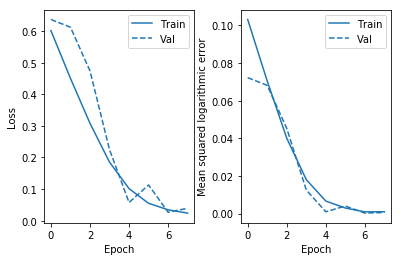

In [288]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss', 'mean_squared_logarithmic_error'])

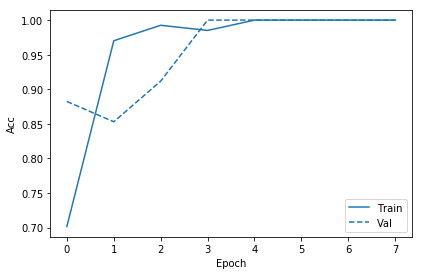

In [289]:
plot_metrics(history,  metrics =  ['acc']) 

42/42 [==============================] - 0s 1ms/step
loss :  0.023636916158942596

mean_squared_logarithmic_error :  0.0009013928470267274

acc :  0.0003890311570774516



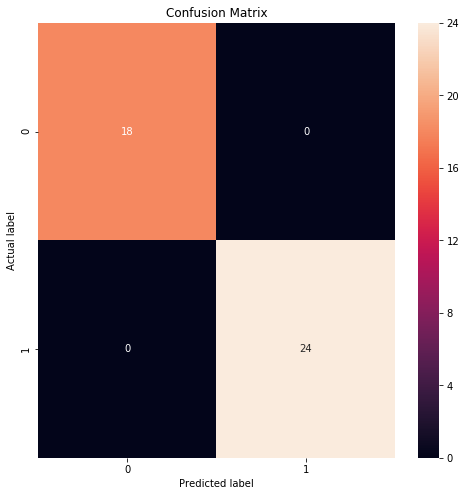

In [290]:
y_test_predictions = model.predict_classes(test, batch_size=1)
baseline_results = model.evaluate(test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test_one_hot, y_test_predictions)

In [308]:
# Defining various initialization parameters for 61-8-4-1 MLP model
num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 8; num_layers_1 = 4

# Define the keras model
model2 = Sequential()
model2.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model2.add(Dense(num_layers_1, activation='relu'))
model2.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_squared_logarithmic_error','acc'])
# Fit keras model
history2 = model2.fit(train, y_train_one_hot, epochs=24, validation_split = 0.20)

Train on 134 samples, validate on 34 samples
Epoch 1/24
134/134 [==============================] - 3s 22ms/step - loss: 0.6864 - mean_squared_logarithmic_error: 0.1290 - acc: 0.6642 - val_loss: 0.6964 - val_mean_squared_logarithmic_error: 0.0834 - val_acc: 0.0000e+00
Epoch 2/24
134/134 [==============================] - 0s 154us/step - loss: 0.6824 - mean_squared_logarithmic_error: 0.1281 - acc: 0.6940 - val_loss: 0.6979 - val_mean_squared_logarithmic_error: 0.0837 - val_acc: 0.0000e+00
Epoch 3/24
134/134 [==============================] - 0s 127us/step - loss: 0.6780 - mean_squared_logarithmic_error: 0.1272 - acc: 0.7537 - val_loss: 0.6995 - val_mean_squared_logarithmic_error: 0.0840 - val_acc: 0.0294
Epoch 4/24
134/134 [==============================] - 0s 120us/step - loss: 0.6748 - mean_squared_logarithmic_error: 0.1265 - acc: 0.7463 - val_loss: 0.7011 - val_mean_squared_logarithmic_error: 0.0843 - val_acc: 0.0588
Epoch 5/24
134/134 [==============================] - 0s 119us/step 

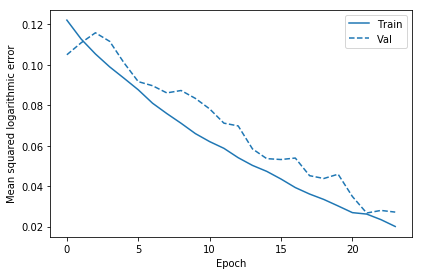

In [302]:
plot_metrics(history2, metrics =  ['mean_squared_logarithmic_error'])

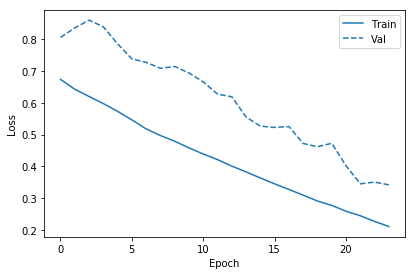

In [303]:
plot_metrics(history2, metrics =  ['loss'])

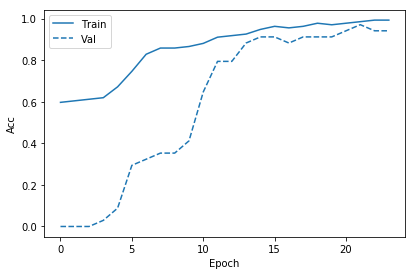

In [304]:
plot_metrics(history2, metrics =  ['acc'])

42/42 [==============================] - 0s 2ms/step
loss :  0.23292913389880032

mean_squared_logarithmic_error :  0.02119992521918556

acc :  1.0



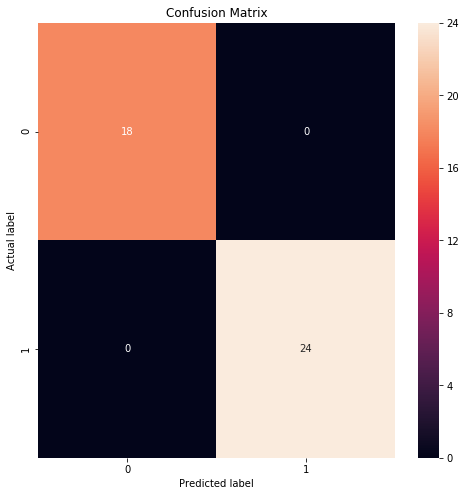

In [307]:
y_test_predictions = model2.predict_classes(test, batch_size=1)
baseline_results = model2.evaluate(test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()

plot_cm(y_test_one_hot, y_test_predictions)